In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [104]:
loan= pd.read_csv('loan-train.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploring Data

In [105]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [106]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [107]:
# find the type of the variables
loan.dtypes    

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

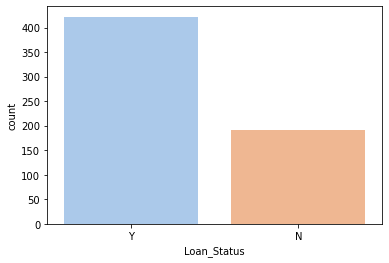

<Figure size 432x288 with 0 Axes>

In [108]:
sns.countplot(x='Loan_Status', data=loan, palette='pastel')
plt.show()
plt.savefig('count plot')

<AxesSubplot:>

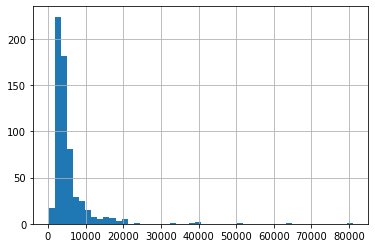

In [109]:
loan['ApplicantIncome'].hist(bins=50)       # not a normal distribution

<AxesSubplot:>

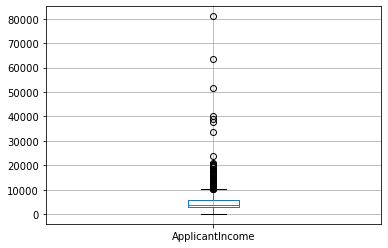

In [110]:
loan.boxplot(column='ApplicantIncome')     # we can see the outliers

<AxesSubplot:>

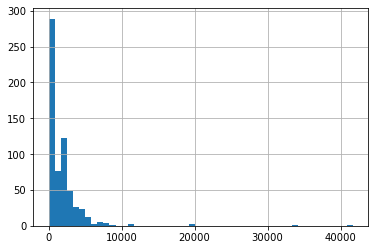

In [111]:
loan['CoapplicantIncome'].hist(bins=50)

<AxesSubplot:>

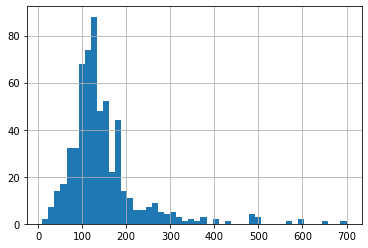

In [112]:
loan['LoanAmount'].hist(bins=50)    # outlier +no normal distribution

<AxesSubplot:>

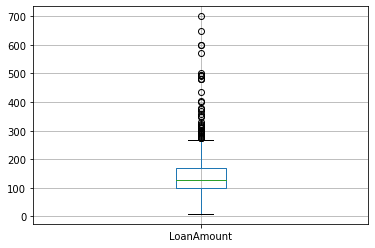

In [113]:
loan.boxplot(column='LoanAmount')

In [114]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Replacing Nulls with Mean/Mode

--> One way to deal with the null values is to replace them with mode/mean values. So, for the categorical variables, we use the mode value of each column, and for the numerical variables, we use the mean value of each column.

In [115]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [116]:
# in Categorical variables, replace the nulls with mode value
for col in categorical_columns:
    loan[col].fillna(loan[col].mode()[0],inplace=True)

# in Nnumeric variables, replcase nulls with mean values of each variable
loan['LoanAmount']=loan['LoanAmount'].fillna(loan['LoanAmount'].mean())


In [117]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [118]:
loan.shape

(614, 13)

# Preprocessing
- Drop Loan_ID column
- Perform Label Encoding - In order to convert character variables, we have to enncode using Label Encoder

#Drop Loan_ID column
#Perform Label Encoding - In order to convert character variables, we have to enncode using Label Encoder

In [119]:
loan.drop('Loan_ID', axis = 1, inplace=True)

In [120]:
# Assigning numerical values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
loan['Gender'] = labelencoder.fit_transform(loan['Gender'])
loan['Married'] = labelencoder.fit_transform(loan['Married'])
loan['Dependents'] = labelencoder.fit_transform(loan['Dependents'])
loan['Education'] = labelencoder.fit_transform(loan['Education'])
loan['Self_Employed'] = labelencoder.fit_transform(loan['Self_Employed'])
loan['Property_Area'] = labelencoder.fit_transform(loan['Property_Area'])
loan['Loan_Status'] = labelencoder.fit_transform(loan['Loan_Status'])

loan.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0


# Naive Bayes with outliers and skewness

In [44]:
from sklearn .model_selection import train_test_split
X=loan[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']] 
y=loan[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((429, 11), (185, 11))

In [45]:
X_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
351,1,0,0,0,0,8750,4167.0,308.0,360.0,1.0,0
593,1,1,0,0,0,3859,3300.0,142.0,180.0,1.0,0


In [46]:
#feature scaling
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [47]:
# I use Gaussian!

from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(X_train,np.ravel(y_train))   #np.ravel() --> to remove the error, we can remove it. Get the same results.

GaussianNB()

In [48]:
y_pred_NaiveBayes=model.predict(X_test)
y_pred_NaiveBayes

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [49]:
from sklearn import metrics
confusion_Matrix_Naive = metrics.confusion_matrix(y_test, y_pred_NaiveBayes) 
print(confusion_Matrix_Naive)
print(metrics.accuracy_score(y_pred_NaiveBayes,y_test))

[[ 22  29]
 [  4 130]]
0.8216216216216217


# Running Naive Bayes model without outliers and remove skewness (noise) in columns (ApplicantIncome, CoApplicantIncome and Loan_Amount), we perform binning
Since there is noise the data and the data is skewed to the right, we perform below two corrective actions:
1. Remove outlier customers with extreme income (above $30000 i.e. 7 customers) - This resulted in better distribution of data
2. Performing normalization using logarithmic function on columns - ApplicantIncome, CoapplicantIncome, LoanAmount. Since we have large number of zeroes in CoApplicantIncome column, we decided to combine ApplicationIncome and CoapplicationIncome as TotalApplicantIncome

## Remove outlier customers with extreme income (above $30000 i.e. 7 customers) - This resulted in better distribution of data

7


(array([110., 300., 106.,  40.,  19.,   7.,  14.,   4.,   6.,   1.]),
 array([  150. ,  2515.3,  4880.6,  7245.9,  9611.2, 11976.5, 14341.8,
        16707.1, 19072.4, 21437.7, 23803. ]),
 <BarContainer object of 10 artists>)

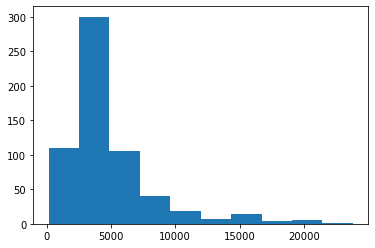

In [50]:
#Remove outlier customers with outlying ApplicantIncome (above $30000 i.e. 7 customers)
print(loan['ApplicantIncome'][loan['ApplicantIncome']>30000].count())
plt.hist(loan['ApplicantIncome'][loan['ApplicantIncome']<30000], bins=10)

4


(array([2., 0., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([20000. , 22166.7, 24333.4, 26500.1, 28666.8, 30833.5, 33000.2,
        35166.9, 37333.6, 39500.3, 41667. ]),
 <BarContainer object of 10 artists>)

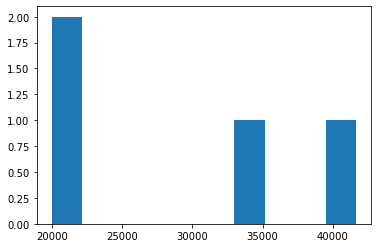

In [51]:
#Remove outlier customers with outlying CoaaplicantIncome (above $15000 i.e. 4 customers)
print(loan['CoapplicantIncome'][loan['CoapplicantIncome']>15000].count())
plt.hist(loan['CoapplicantIncome'][loan['CoapplicantIncome']>15000], bins=10)

5


(array([ 31., 143., 258., 104.,  26.,  23.,   9.,   5.,   3.,   6.]),
 array([  9. ,  57.7, 106.4, 155.1, 203.8, 252.5, 301.2, 349.9, 398.6,
        447.3, 496. ]),
 <BarContainer object of 10 artists>)

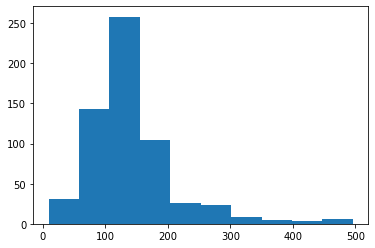

In [52]:
#Remove outlier customers with outlying loan amount (above $500 i.e. 5 customers)
print(loan['LoanAmount'][loan['LoanAmount']>500].count())
plt.hist(loan['LoanAmount'][loan['LoanAmount']<500], bins=10)

In [53]:
print(loan['ApplicantIncome'][loan['ApplicantIncome']>30000].index)
print(loan['CoapplicantIncome'][loan['CoapplicantIncome']>15000].index)
print(loan['LoanAmount'][loan['LoanAmount']>500].index)

Int64Index([155, 171, 183, 185, 333, 409, 443], dtype='int64')
Int64Index([402, 417, 581, 600], dtype='int64')
Int64Index([130, 155, 171, 369, 561], dtype='int64')


In [54]:
#Create dataset without outliers - drop rows 
loan_noOutliers = loan.copy()
loan_noOutliers.drop(loan_noOutliers['ApplicantIncome'][loan_noOutliers['ApplicantIncome']>30000].index, inplace=True)
loan_noOutliers.drop(loan_noOutliers['CoapplicantIncome'][loan_noOutliers['CoapplicantIncome']>15000].index, inplace=True)
loan_noOutliers.drop(loan_noOutliers['LoanAmount'][loan_noOutliers['LoanAmount']>500].index, inplace=True)

In [55]:
loan_noOutliers.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Naive Bayes without outliers and skewness-droppinng outliers (method1)

In [56]:
#Naive Bayes- Without outliers- method2: using log function
X=loan_noOutliers[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']] 
y=loan_noOutliers[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((420, 11), (180, 11))

In [57]:
#feature scaling
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [58]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(X_train,np.ravel(y_train))   #np.ravel() --> to remove the error, we can remove it. Get the same results.

GaussianNB()

In [59]:
y_pred_NaiveBayes_noOutliers_drop=model.predict(X_test)
y_pred_NaiveBayes_noOutliers_drop

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1])

In [60]:
from sklearn import metrics
confusion_Matrix_Naive = metrics.confusion_matrix(y_test, y_pred_NaiveBayes_noOutliers_drop) 
print(confusion_Matrix_Naive)
print(metrics.accuracy_score(y_pred_NaiveBayes_noOutliers_drop,y_test))

[[ 25  34]
 [  3 118]]
0.7944444444444444


# Performing normalization using logarithmic function on columns - ApplicantIncome, CoapplicantIncome, LoanAmount. Since we have large number of zeroes in CoApplicantIncome column, we decided to combine ApplicationIncome and CoapplicationIncome as TotalApplicantIncome



In [121]:
#Performing normalization using logarithmic function on columns - ApplicantIncome, CoapplicantIncome, LoanAmount. Since we have large number of zeroes in CoApplicantIncome column, we decided to combine ApplicationIncome and CoapplicationIncome as TotalApplicantIncome

loan['TotalApplicantIncome']=loan['ApplicantIncome']+loan['CoapplicantIncome']
loan['TotalApplicantIncome']

# applying log function on TotalApplicantIncome & LoanAmount_log
loan['TotalApplicantIncome_log']=np.log(loan['TotalApplicantIncome'])    
loan['LoanAmount_log']=np.log(loan['LoanAmount'])

In [122]:
loan.shape

(614, 15)

<AxesSubplot:>

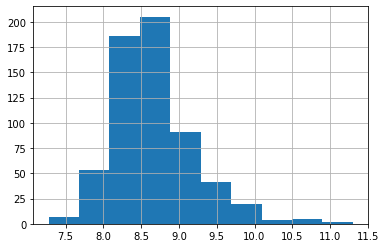

In [123]:
loan['TotalApplicantIncome_log'].hist(bins=10) 

<AxesSubplot:>

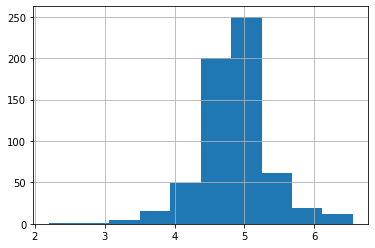

In [124]:
loan['LoanAmount_log'].hist(bins=10)

## Naive Bayes without outliers and skewness-log function normalization (method 2)

In [125]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalApplicantIncome', 'TotalApplicantIncome_log', 'LoanAmount_log'],
      dtype='object')

In [126]:
#Naive Bayes- Without outliers- method2: using log function
X=loan[['Gender','Married','Dependents','Education','Self_Employed','TotalApplicantIncome_log','LoanAmount_log','Loan_Amount_Term','Credit_History','Property_Area']] 
y=loan[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((429, 10), (185, 10))

In [127]:
#feature scaling
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [128]:
model=GaussianNB()
model.fit(X_train,np.ravel(y_train))   #np.ravel() --> to remove the error, we can remove it. Get the same results.

GaussianNB()

In [129]:
y_pred_NaiveBayes_logfunction=model.predict(X_test)
y_pred_NaiveBayes_logfunction

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [130]:
from sklearn import metrics
confusion_Matrix_Naive = metrics.confusion_matrix(y_test, y_pred_NaiveBayes_logfunction) 
print(confusion_Matrix_Naive)
print(metrics.accuracy_score(y_pred_NaiveBayes_logfunction,y_test))

[[ 21  30]
 [  3 131]]
0.8216216216216217
